In [5]:
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import sys
sys.path.append("..")
from datasets.hollywood2 import build_hollywood2_wavspec_dataset
from infi_tf import load_infi_skip
import numpy as np

In [10]:
infi = load_infi_skip("weights/hollywood2_speech_wnum2/20211207-145039-Epoch20.h5")
x_test = build_hollywood2_wavspec_dataset(list_path="../datasets/Hollywood2/list_test.txt",
                                          root_path="../datasets/Hollywood2/spectrograms/").batch(10)
y_pred = infi.predict(x_test)

In [11]:
y_true = np.load("../datasets/Hollywood2/redundancy_labels/speech_wnum2_test.npy")

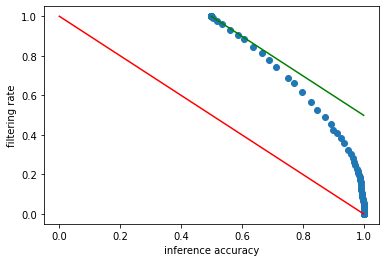

In [12]:
def eval_skip(y_true, y_pred, threshold=0.5):
    wrong_count = 0
    filtered_count = 0
    for y1, y2 in zip(y_true, y_pred):
        if y1[0] == 1 and y2[0] < threshold:
            wrong_count += 1
        if y2[0] < threshold:
            filtered_count += 1
    
    total_num = len(y_true)
    filtered_rate = filtered_count / total_num
    label_acc = 1. - wrong_count / total_num
    
    return label_acc, filtered_rate

TN = 1.0 - y_true.sum() / len(y_true)
acc_list = []
r_list = []
for threshold in np.arange(0., 1.01, 0.01):
    acc, r = eval_skip(y_true, y_pred, threshold)
    acc_list.append(acc)
    r_list.append(r)

plt.scatter(acc_list, r_list)
worst_x = [0., 1.]
worst_y = [1., 0.]
optimal_x = [TN, 1.]
optimal_y = [1., TN]
plt.plot(worst_x, worst_y, 'r')
plt.plot(optimal_x, optimal_y, 'g')
# plt.plot([TN, 1.], [1.,0.])
plt.xlabel("inference accuracy")
plt.ylabel("filtering rate")
plt.show()